## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [4]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [5]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [6]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [7]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

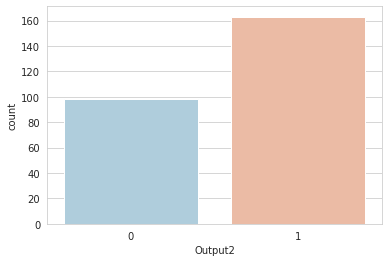

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

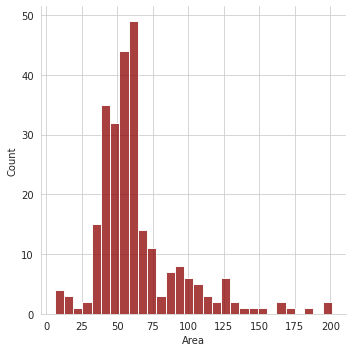

In [9]:
sns.displot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

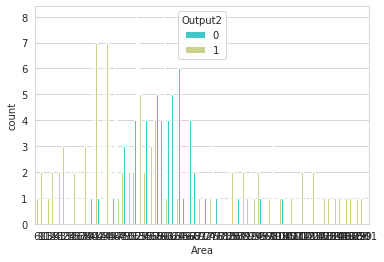

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

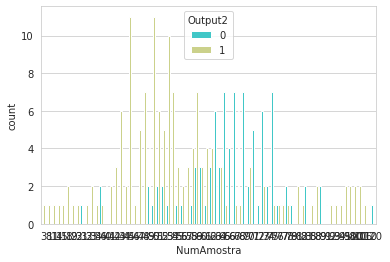

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

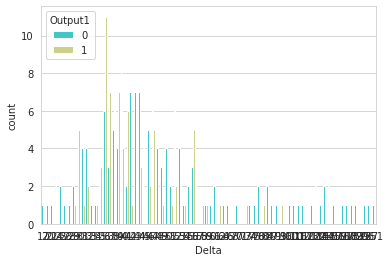

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [13]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

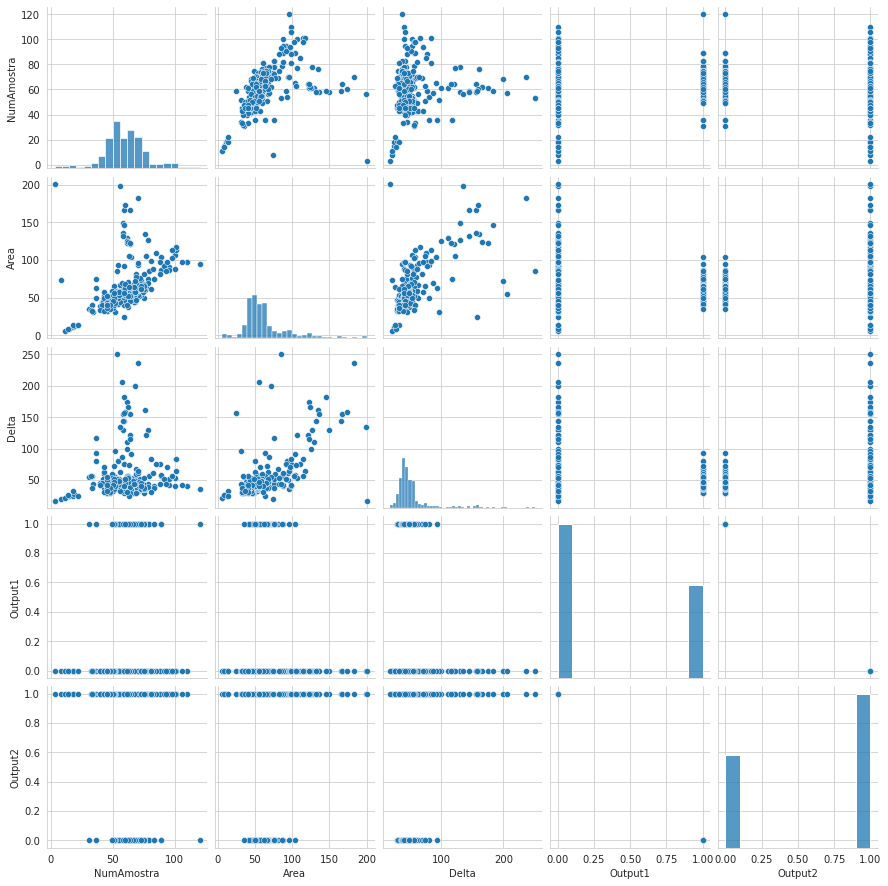

In [14]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

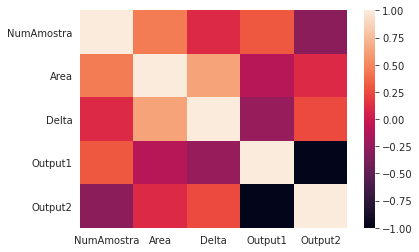

In [15]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [17]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.564103,0.384615,0.217949,1.0,0.0
1,0.735043,0.415385,0.166667,1.0,0.0
2,0.555556,0.323077,0.162393,1.0,0.0
3,0.282051,0.225641,0.269231,1.0,0.0
4,0.581197,0.338462,0.141026,1.0,0.0


### Conjunto de dados para o treinamento

In [18]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=654321)

print(y_test)
print(X_test)

     Output1  Output2
173        0        1
179        0        1
168        0        1
250        0        1
67         1        0
..       ...      ...
79         1        0
104        0        1
14         1        0
64         1        0
243        0        1

[79 rows x 2 columns]
     NumAmostra      Area     Delta
173    0.786325  0.415385  0.106838
179    0.427350  0.256410  0.141026
168    0.521368  0.600000  0.423077
250    0.247863  0.143590  0.166667
67     0.512821  0.276923  0.102564
..          ...       ...       ...
79     1.000000  0.456410  0.081197
104    0.435897  0.261538  0.132479
14     0.598291  0.348718  0.145299
64     0.487179  0.230769  0.094017
243    0.094017  0.015385  0.038462

[79 rows x 3 columns]


## Criando o Modelo de MPL

In [20]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden_1 = 12
N_hidden_2 = 6
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [21]:
#Pesos da Camada Oculta 1(Inicialização Aleatória)
weights_input_hidden_1 = np.random.normal(0, scale=0.1, size=(N_input, N_hidden_1))
print('Pesos da Camada Oculta:')
print(weights_input_hidden_1)

#Pesos da Camada Oculta 2(Inicialização Aleatória)
weights_input_hidden_2 = np.random.normal(0, scale=0.1, size=(N_hidden_1, N_hidden_2))
print('Pesos da Camada Oculta:')
print(weights_input_hidden_2)


#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden_2 , N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.07113316  0.03636438 -0.10315442 -0.20403378  0.13218339  0.00123327
  -0.05528186 -0.01127666 -0.02225721  0.09612949 -0.08581348  0.0311204 ]
 [-0.17651517 -0.02395921  0.02992037  0.11347416 -0.12240177  0.04930529
  -0.04751929 -0.04422939  0.02814774  0.09740101 -0.17267579 -0.11919446]
 [ 0.02033291  0.06609798  0.13290697  0.00227538  0.03124252  0.06350191
   0.02655582 -0.14632768 -0.19754804  0.15409124 -0.1015801   0.05668693]]
Pesos da Camada Oculta:
[[ 0.04982756 -0.08908417  0.01624859  0.08181346 -0.07878741  0.05739153]
 [ 0.26850626 -0.05622068 -0.15807099  0.007203   -0.23247083 -0.08071616]
 [-0.04629991 -0.04726786 -0.06854626  0.1604467   0.14416701 -0.01205482]
 [ 0.21946003 -0.00961831  0.15394484  0.04729471  0.04265665 -0.03159017]
 [-0.0051154   0.02049943 -0.02658151  0.0866301  -0.00356697 -0.13510877]
 [-0.09258254 -0.06870172 -0.19451728 -0.08183234  0.06670007  0.02756017]
 [-0.02771158  0.06528595 -0.09352995 -0.11665629  0.0

## Função que calcula a acurácia do modelo

In [22]:
def measure_accuracy():
    # Calcule a precisão dos dados de teste
    n_records, n_features = X_test.shape
    predictions=0

    for xi, yi in zip(X_test.values, y_test.values):

    # Forward Pass
            #Camada oculta 1
            #Calcule a combinação linear de entradas e pesos sinápticos
            hidden_layer_input_1 = np.dot(xi, weights_input_hidden_1)
            #Aplicado a função de ativação
            hidden_layer_output_1 = sigmoid(hidden_layer_input_1)
            
            #Camada oculta 2
            #Calcule a combinação linear de entradas e pesos sinápticos
            hidden_layer_input_2 = np.dot(hidden_layer_output_1, weights_input_hidden_2)
            #Aplicado a função de ativação
            hidden_layer_output_2 = sigmoid(hidden_layer_input_2)

            #Camada de Saída
            #Calcule a combinação linear de entradas e pesos sinápticos
            output_layer_in = np.dot(hidden_layer_output_2, weights_hidden_output)

            #Aplicado a função de ativação 
            output = sigmoid(output_layer_in)

    #-------------------------------------------    

    #Cálculo do Erro da Predição
            ## TODO: Cálculo do Erro        
            if (output[0]>output[1]):
                if (yi[0]>yi[1]):
                    predictions+=1

            if (output[1]>=output[0]):
                if (yi[1]>yi[0]):
                    predictions+=1
                    
    return predictions/n_records

## Algoritmo Backpropagation

In [23]:
epochs = 500000
target_loss = 0.1
last_loss=None
EvolucaoError=[]
IndiceError=[]
Accuracies=[]

for e in range(epochs):
    delta_w_i_h_1 = np.zeros(weights_input_hidden_1.shape)
    delta_w_i_h_2 = np.zeros(weights_input_hidden_2.shape)

    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta 1
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_1 = np.dot(xi, weights_input_hidden_1)
        #Aplicado a função de ativação
        hidden_layer_output_1 = sigmoid(hidden_layer_input_1)
        
        #Camada oculta 2
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input_2 = np.dot(hidden_layer_output_1, weights_input_hidden_2)
        #Aplicado a função de ativação
        hidden_layer_output_2 = sigmoid(hidden_layer_input_2)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output_2, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error_2 = np.dot(weights_hidden_output, output_error_term)
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term_2 = hidden_error_2 * hidden_layer_output_2 * (1 - hidden_layer_output_2)
        
        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error_1 = np.dot(weights_input_hidden_2, hidden_error_term_2)
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term_1 = hidden_error_1 * hidden_layer_output_1 * (1 - hidden_layer_output_1)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output_2[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h_2 += hidden_error_term_2 * hidden_layer_output_1[:, None]
        delta_w_i_h_1 += hidden_error_term_1 * xi[:, None]
       
        
    #Atualização dos pesos na época em questão
    weights_input_hidden_1 += learnrate * delta_w_i_h_1 / n_records
    weights_input_hidden_2 += learnrate * delta_w_i_h_2 / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    
#     if  e % (epochs / 20) == 0:
    hidden_output_1 = sigmoid(np.dot(xi, weights_input_hidden_1))
    hidden_output_2 = sigmoid(np.dot(hidden_output_1, weights_input_hidden_2))
    out = sigmoid(np.dot(hidden_output_2, weights_hidden_output))
    loss = np.mean((out - yi) ** 2)

#     if last_loss and last_loss < loss:
#         print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
#     else:
#         print("Erro quadrático no treinamento: ", loss)
    last_loss = loss
    
    EvolucaoError.append(loss)
    IndiceError.append(e)
    accuracy = measure_accuracy()
    Accuracies.append(accuracy)
            
    if(loss < target_loss):
        break

In [24]:
### Gráfico da Evolução do Erro

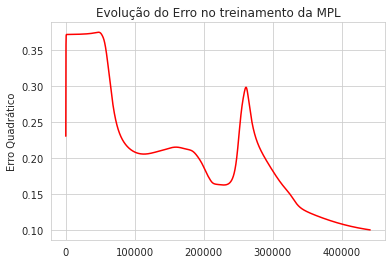

In [25]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

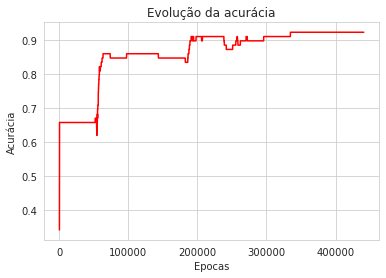

In [26]:
plt.plot(IndiceError, Accuracies, 'r') # 'r' is the color red
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.title('Evolução da acurácia')
plt.show()

## Validação do modelo

In [27]:
print("A Acurácia da Predição é de: {:.3f}".format(measure_accuracy()))

A Acurácia da Predição é de: 0.924
